# 12.2 Die Perzeptron-Lernregel

In dem Abschnitt über das Perzeptron waren die Gewichte und der Schwellenwert vorgegeben. Aber wie kommt man dazu? In diesem Abschnitt beschäftigen wir uns damit, wie die Gewichte und der Schwellenwert gewählt werden müssen, damit das Perzeptron seine binäre Klassifikationsaufgabe erfüllen kann.

```{admonition} Lernziele
:class: goals
* Sie kennen die drei Phasen, in denen ein Perzeptron trainiert wird:
  * Initialisierung der Gewichte und Festlegung der Lernrate;
  * Berechnung des prognostizierten Outputs und Aktualisierung der Gewichte sowie
  * Terminierung des Trainings.
* In Zusammenhang mit dem Training von ML-Verfahren kennen Sie die Fachbegriffe Lernrate und Epoche.
```

## Hebbsche Regel

Kaum zu glauben, aber die Idee zum Lernen der Gewichte eines Perzeptrons stammt
nicht von Informatiker:innen, sondern von einem Psychologen namens [Donald
Olding Hebb](https://de.wikipedia.org/wiki/Donald_O._Hebb). Im Englischen wird
seine Arbeit meist durch das Zitat

>"what fires together, wires together"

kurz zusammengefasst. Hebb hat die Veränderung der synaptischen Übertragung von
Neuronen untersucht und dabei festgestellt, dass je häufiger zwei Neuronen
gemeinsam aktiv sind, desto eher werden die beiden aufeinander reagieren.

Die Hebbsche Regel wird beim maschinellen Lernen dadurch umgesetzt, dass der
Lernprozess mit zufälligen Gewichten startet und dann der prognostizierte Output
mit dem echten Output verglichen wird. Je nachdem, ob der echte Output erreicht
wurde oder nicht, werden nun die Gewichte und damit der Einfluss eines einzelnen
Inputs verstärkt oder nicht. Dieser Prozess — Vergleichen und Abändern der
Gewichte — wird solange wiederholt, bis die passenden Gewichte gefunden sind.

```{admonition} Mini-Übung
:class: miniexercise
Angenommen, in unserem "Ist-der-Rasen-nass-Problem" (siehe [](rasen_nass_problem)) sind die Gewichte alle Null, also $\omega_0 = \omega_1 = \omega_2 = 0$. Was prognostiziert das Perzeptron für "es regnet nicht" ($x_1=0$) und "der Rasensprenger ist aus" ($x_2=0$)?
```

````{admonition} Lösung
:class: minisolution, toggle
Das Perzeptron prognostiziert fälschlicherweise, dass der Rasen nass ist. Die gewichtete Summe wird zu

$$\mathbf{x}^{T} \boldsymbol{\omega} = \begin{pmatrix} 0, 0, 0 \end{pmatrix} \cdot \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} = 0$$

berechnet. Da aber dann noch die Aktivierungsfunktion (Heaviside-Funktion) angewendet werden muss, erhalten wir

$$\Phi(0)=1,$$

also der Rasen ist nass.
````

## Lernregel für das Perzeptron

Wie werden die Gewichte konkret verstärkt oder abgeschwächt, wenn der
prognostizierte Output nicht mit dem echten Output übereinstimmt? Die Lernregel
für das Perzeptron sieht zunächst einmal kompliziert aus:

$$\omega_i^{\text{neu}} = \omega_i^{\text{aktuell}} + \alpha \cdot(y -
\hat{y}^{\text{aktuell}}) \cdot x_i.\strut$$

Gehen wir die Rechenvorschrift Stück für Stück durch. Zunächst einmal fällt auf,
dass ein Index $i$ auftaucht. Das liegt daran, dass wir mehrere Eingabewerte
haben und damit mehrere Gewichte — ein Gewicht pro Eingabewert. Da die
Lernvorschrift allgemeingültig formuliert werden soll, gehen wir jetzt einfach
mal davon aus, dass wir $m$ verschiedene Eingabewerte haben. $x_i$ meint also
den i-ten Eingabewert und mit $\omega_i$ bezeichnen wir das dazugehörige
Gewicht. Dabei dürfen wir den Bias nicht vergessen.

Bisher hatten wir den Output einfach mit $y$ gekennzeichnet. Jetzt müssen wir
aber etwas sorgfältiger vorgehen und genau unterscheiden, ob wir den Output
meinen, den das Perzeptron prognostiziert oder den echten (gemessenen) Output.
Über berechnete bzw. prognostizierte Outputs setzen wir ein kleines Dachsymbol
$\wedge$. Etwas präziser bezeichnen wir den prognostizierten Output, den das
Perzeptron mit den aktuellen Gewichten $(\omega_0^{\text{aktuell}},
\omega_1^{\text{aktuell}}, \ldots, \omega_m^{\text{aktuell}})$ berechnen würde,
mit der Abkürzung $\hat{y}^{\text{aktuell}}$ . Für den echten Output bleiben wir
einfach bei der Bezeichnung $y$.

Fehlt noch das $\alpha$, doch dazu kommen wir gleich. Schauen wir uns erst
einmal an, wie sich die Differenz $y - \hat{y}^{\text{aktuell}}$ auf die
Verstärkung oder Abschwächung der Gewichte auswirkt.

Wenn der echte Output und der prognostizierte Output gleich sind, ist deren
Differenz Null und es ändert sich nichts. Ansonsten gibt es zwei Möglichkeiten:

* Wenn der *echte Output größer ist als der prognostizierte Output*, dann ist
  $y - \hat{y}^{\text{aktuell}} > 0$. Indem wir nun zu den alten Gewichten den Term
  $ \alpha \cdot(y - \hat{y}^{\text{aktuell}})$ addieren, verstärken wir die
  alten Gewichte. Dabei berücksichtigen wir, ob der Input überhaupt einen
  Beitrag zum Output liefert, indem wir zusätzlich mit $x_i$ multiplizieren. Ist
  nämlich der Input $x_i=0$, wird so nichts an den Gewichten geändert.
* Ist jedoch *der echte Output kleiner als der prognostizierte Output*, dann ist
  $y - \hat{y}^{\text{aktuell}} < 0$. Daher werden nun die alten Gewichte durch
  die Addition des negativen Terms $\alpha \cdot(y - \hat{y}^{\text{aktuell}})
  \cdot x_i$ abgeschwächt.

Damit die Schritte zwischen der Abschwächung und der Verstärkung nicht zu groß
werden, werden sie noch mit einem Vorfaktor $\alpha$ multipliziert, der zwischen
0 und 1 liegt. Ein typischer Wert von $\alpha$ ist $0.0001$. Dieser Vorfaktor
$\alpha$ wird **Lernrate** genannt.

```{admonition} Was ist ... die Lernrate?
Die Lernrate ist eine Zahl, die zu Beginn des ML-Trainings gesetzt wird (ein sogenannter Hyperparameter). Sie bestimmt, wie stark die neuen Gewichte auf Fehler zwischen Prognose und tatsächlichem Output des aktuellen Durchgangs reagieren.
```

(perzeptron_training_logisches_oder)=
## Perzeptron-Training am Beispiel des logischen ODER

Das logische Oder ist bereits durch die Angabe der folgenden vier Datensätzen
komplett definiert. Dabei haben wir noch die Bias-Einheit $x_0=1$ ergänzt.

x0 | x1 | x2 | y
---|---|----|---
1  | 0 | 0  | 0
1  | 0 | 1  | 1
1  | 1 | 0  | 1
1  | 1 | 1  | 1

Im Folgenden wird das Training eines Perzeptrons Schritt für Schritt vorgerechnet.

### Schritt 1: Initialisierung der Gewichte und der Lernrate

Wir brauchen für die drei Inputs drei Gewichte und setzen diese drei Gewichte
jeweils auf 0. Wir sammeln die Gewichte als Vektor, also

$$\boldsymbol{\omega} = \begin{pmatrix}\omega_0 \\ \omega_1 \\ \omega_2\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0\end{pmatrix}.$$

Darüber hinaus müssen wir uns für eine Lernrate $\alpha$ entscheiden. Obwohl
normalerweise ein kleiner (aber positiver) Wert gewählt wird, setzen wir der
Einfachheit halber die Lernrate auf 1, also $\alpha = 1$.

### Schritt 2: Berechnung des Outputs und ggf. Anpassung der Gewichte

Wir setzen nun solange nacheinander den ersten, zweiten, dritten und vierten
Trainingsdatensatz in die Berechnungsvorschrift unseres Perzeptrons ein, bis die
Gewichte für alle vier Trainingsdatensätze zu einer korrekten Prognose führen.
Zur Erinnerung, wir berechnen den aktuellen Output des Perzeptrons mit der
Formel

$$\hat{y}^{aktuell} = \Phi(\mathbf{x}^{T}\boldsymbol{\omega}) = \Phi(x_0
\omega_0 + x_1 \omega_1 + x_2 \omega_2 ).\strut$$

Blättern Sie Seite für Seite durch. Jede Seite entspricht einem Durchgang. Ein Durchgang wird im ML (wie auch in der Mathematik) als eine **Iteration** bezeichnet.


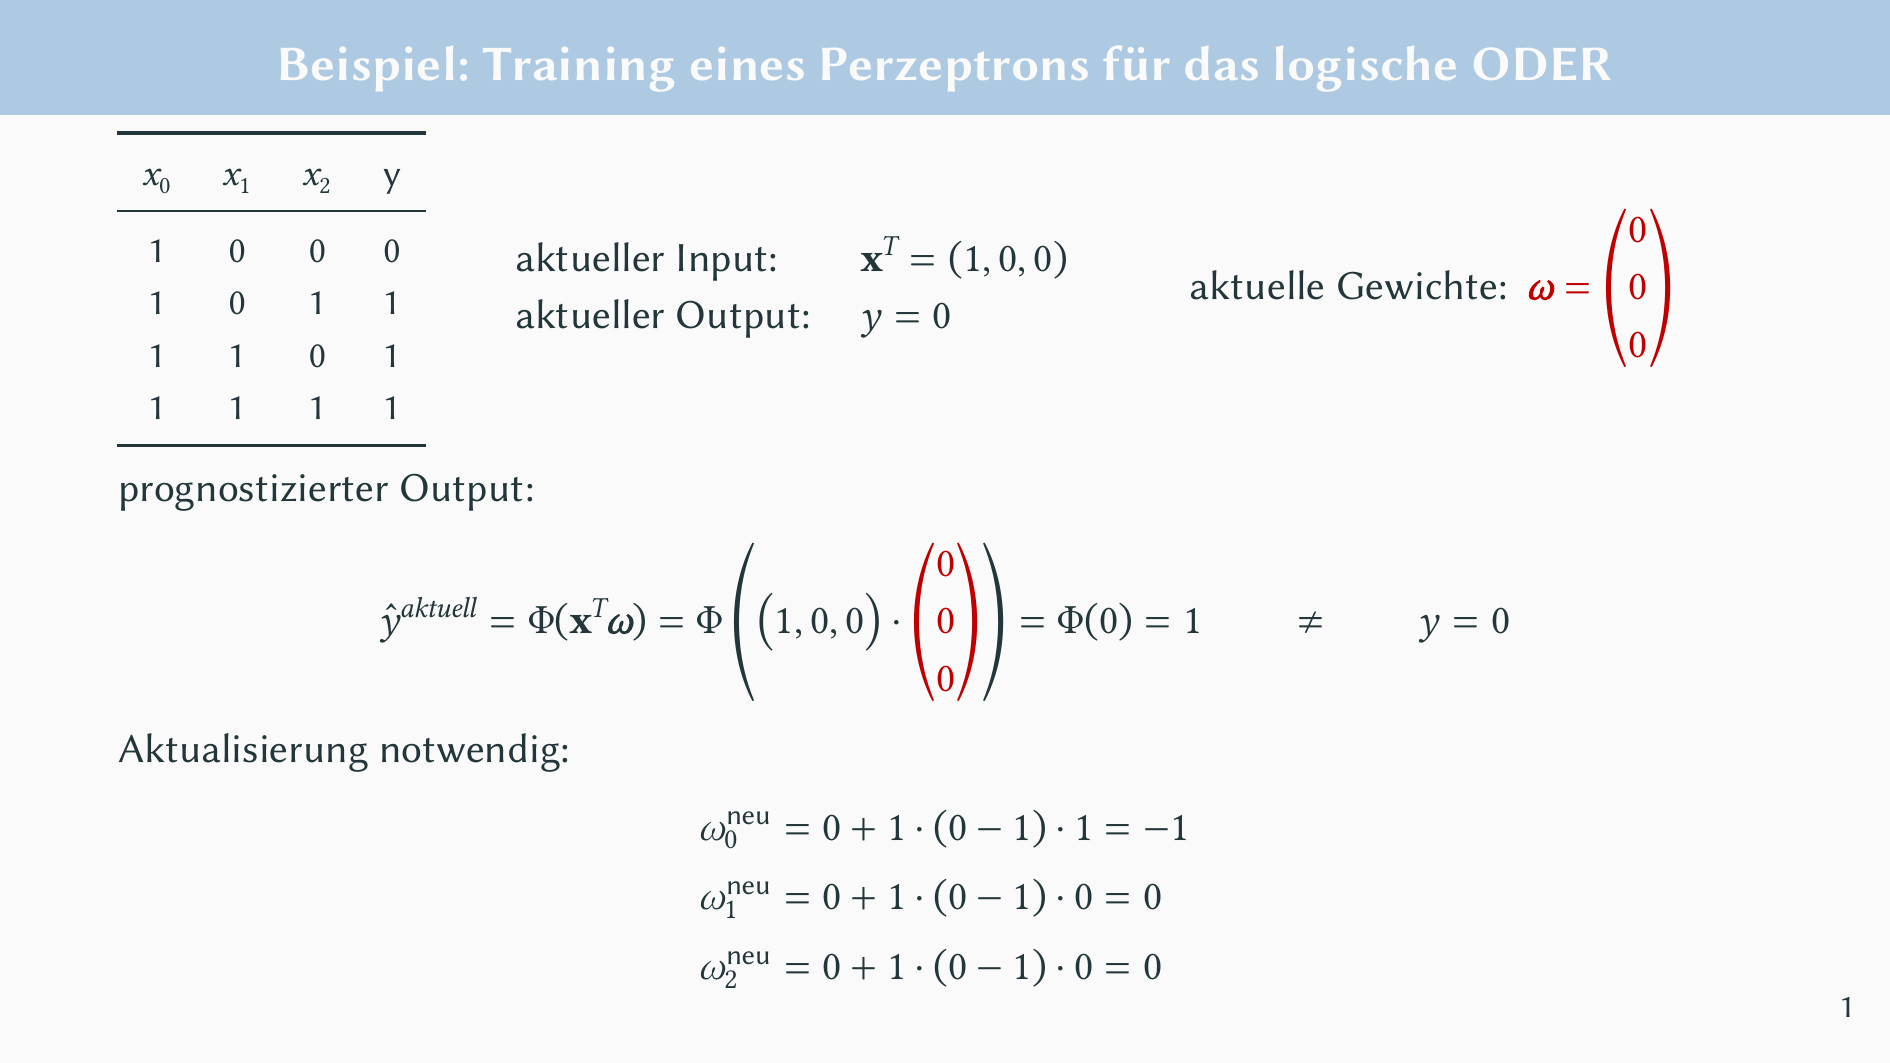
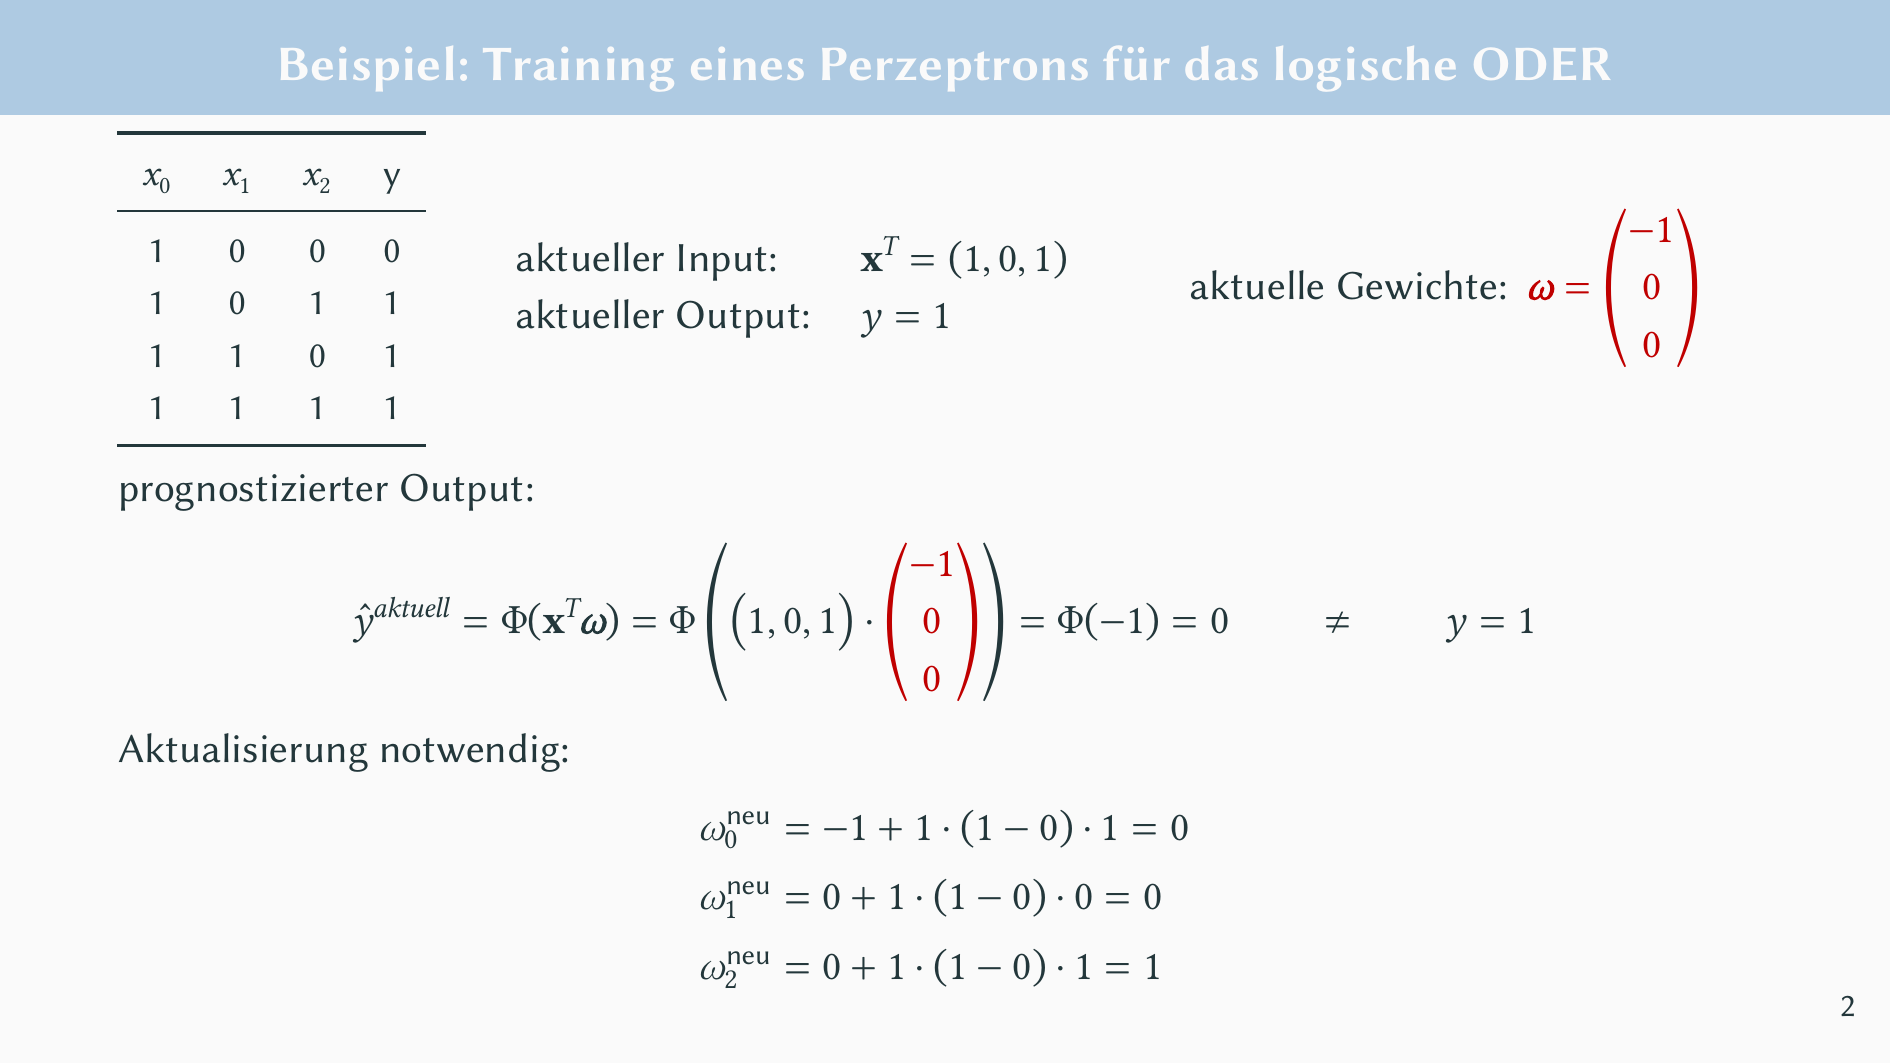
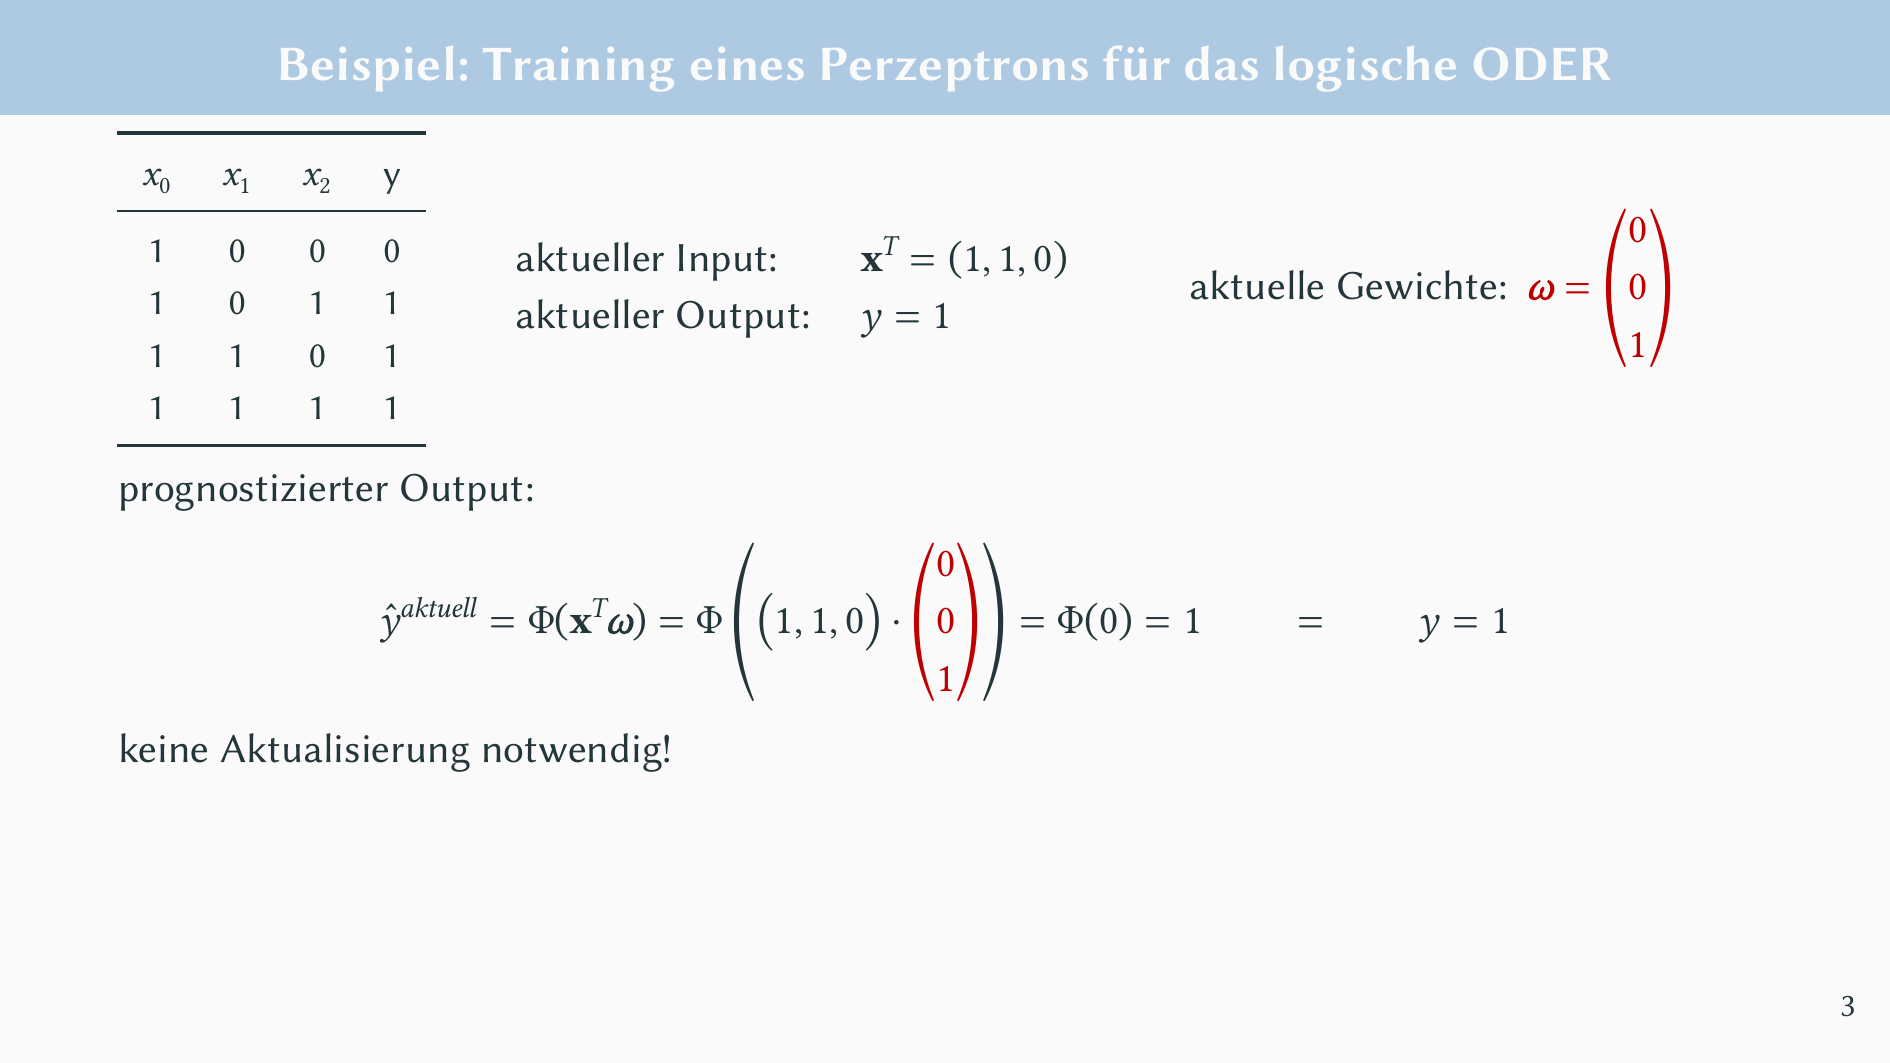
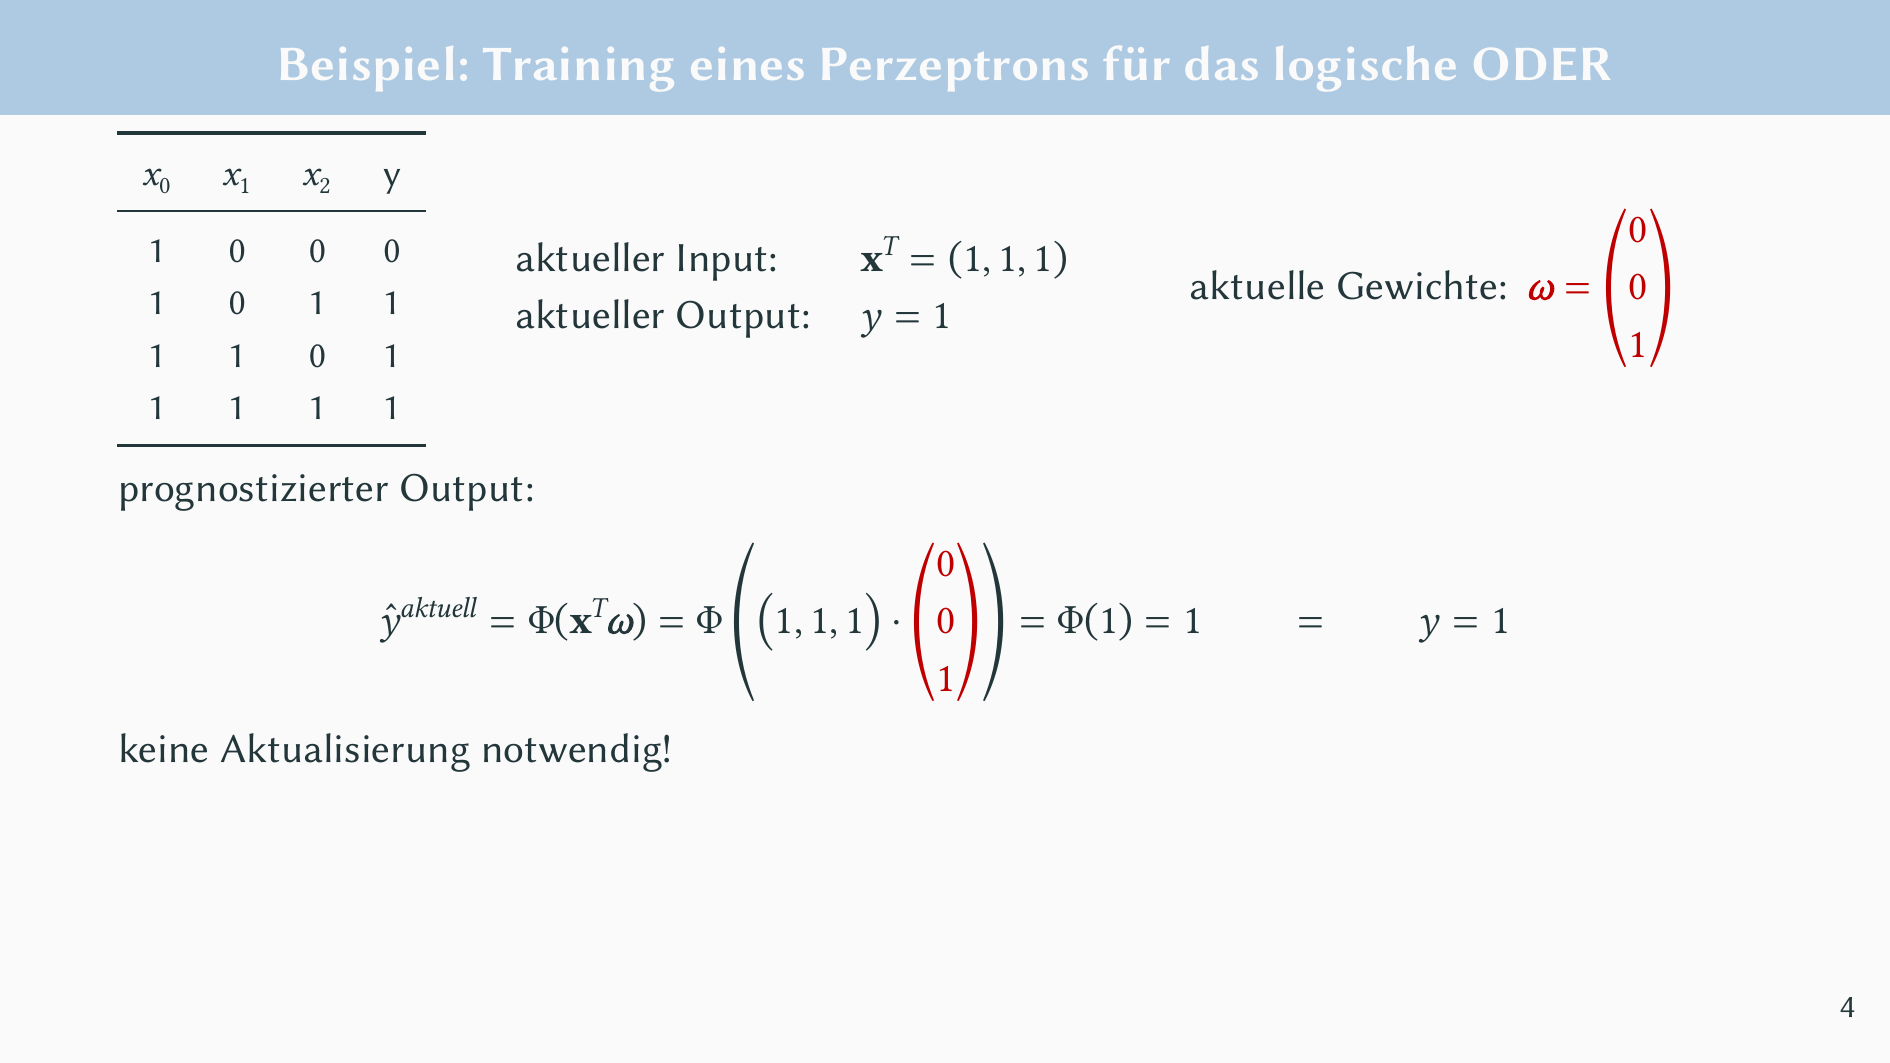
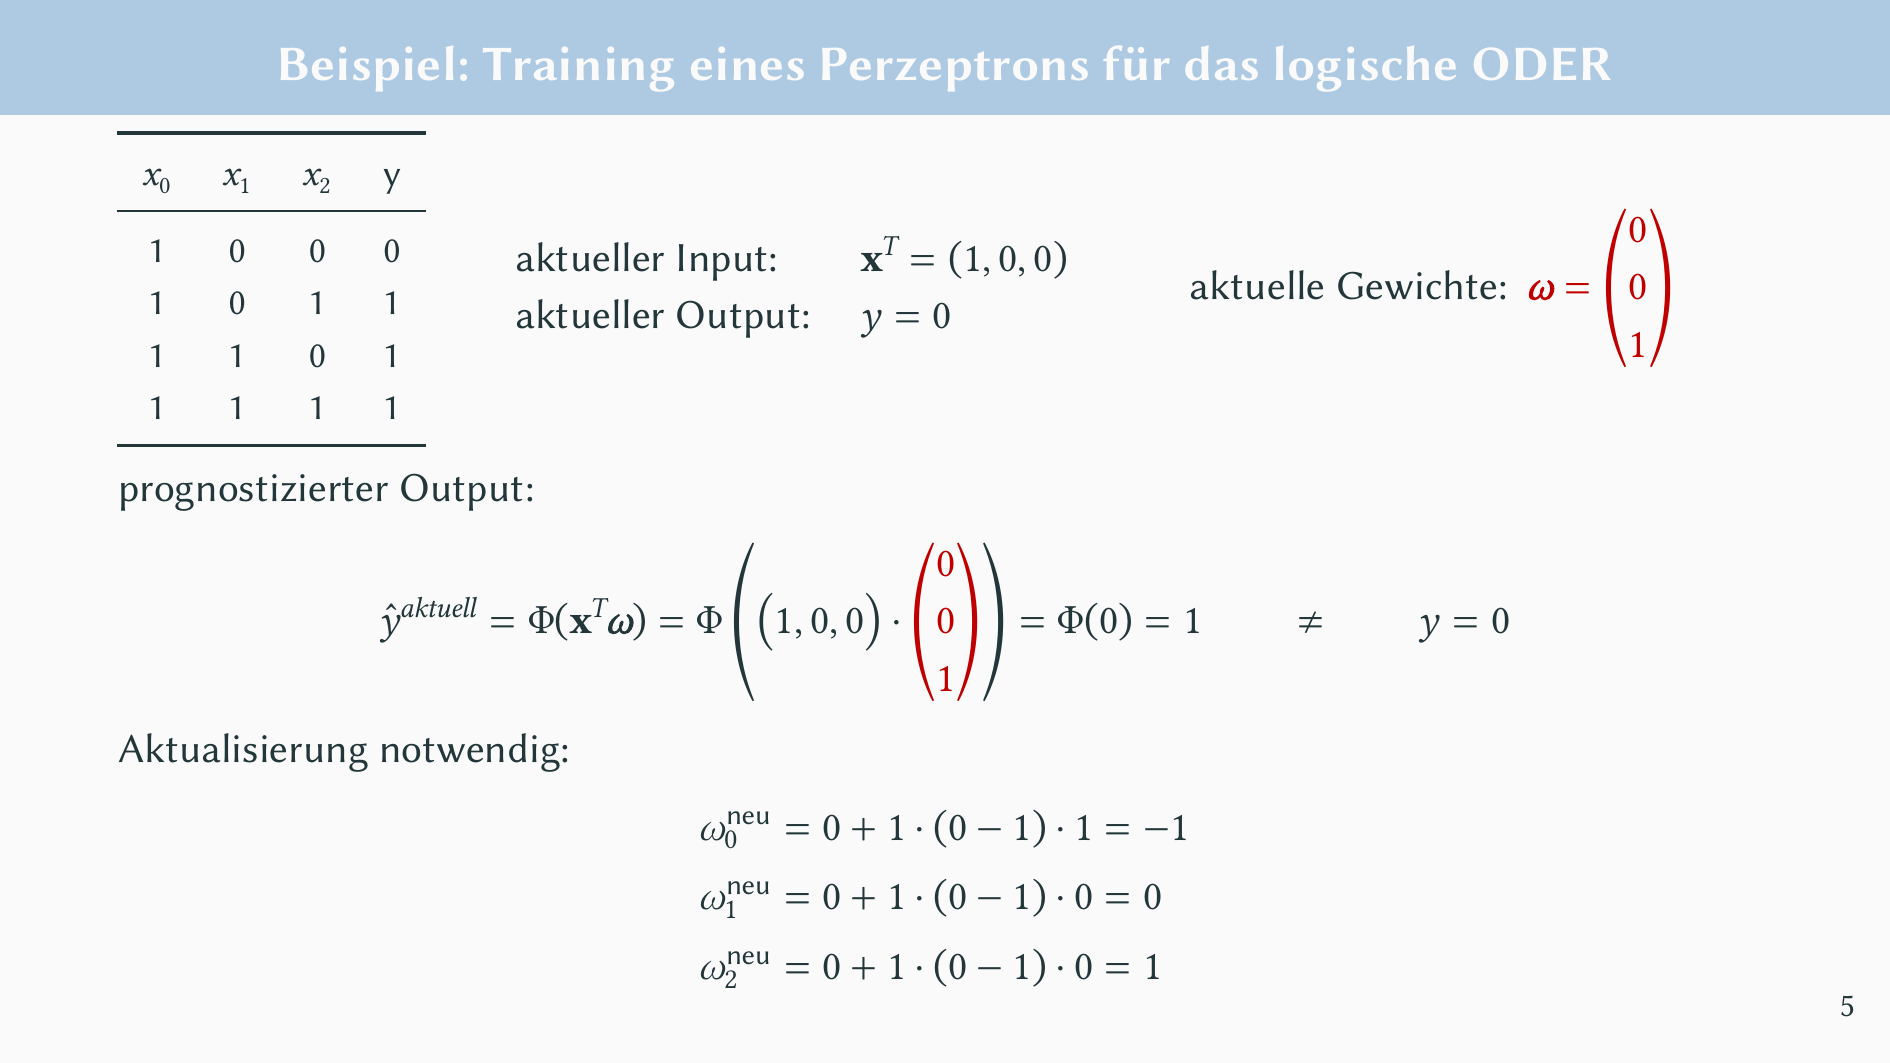
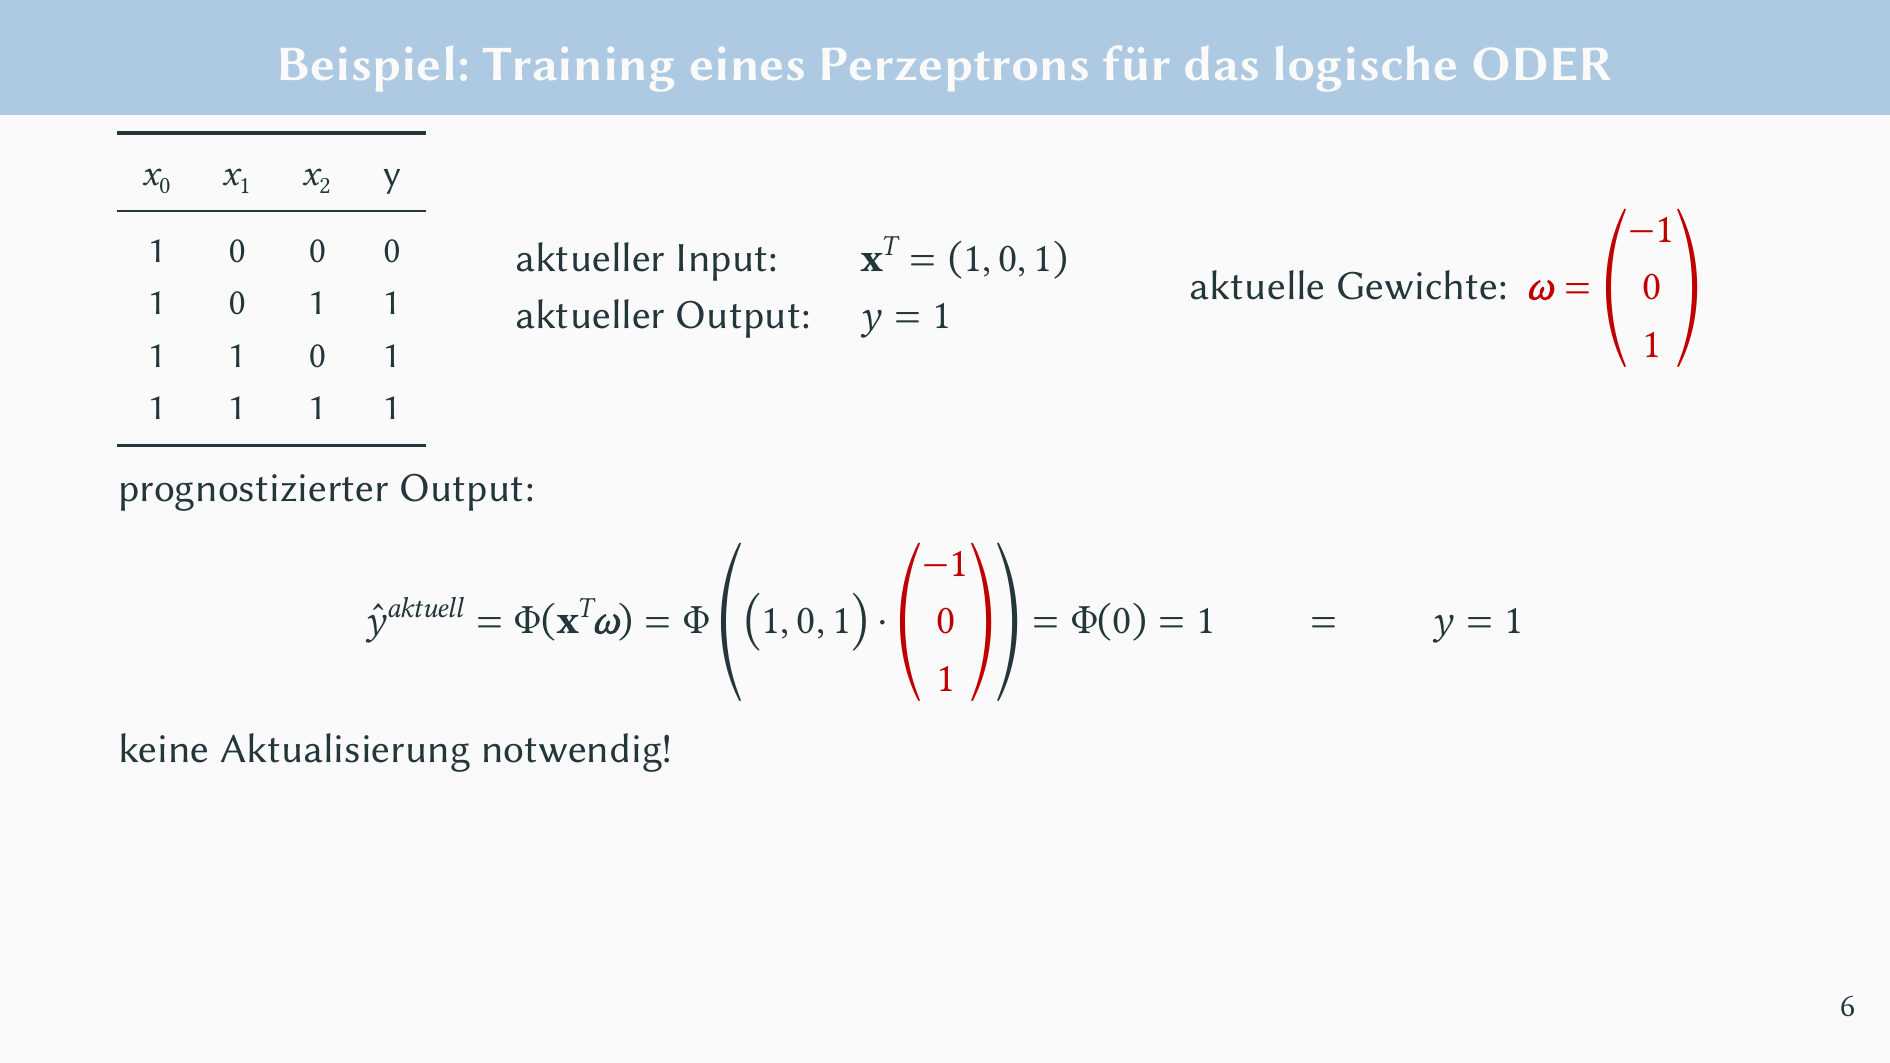
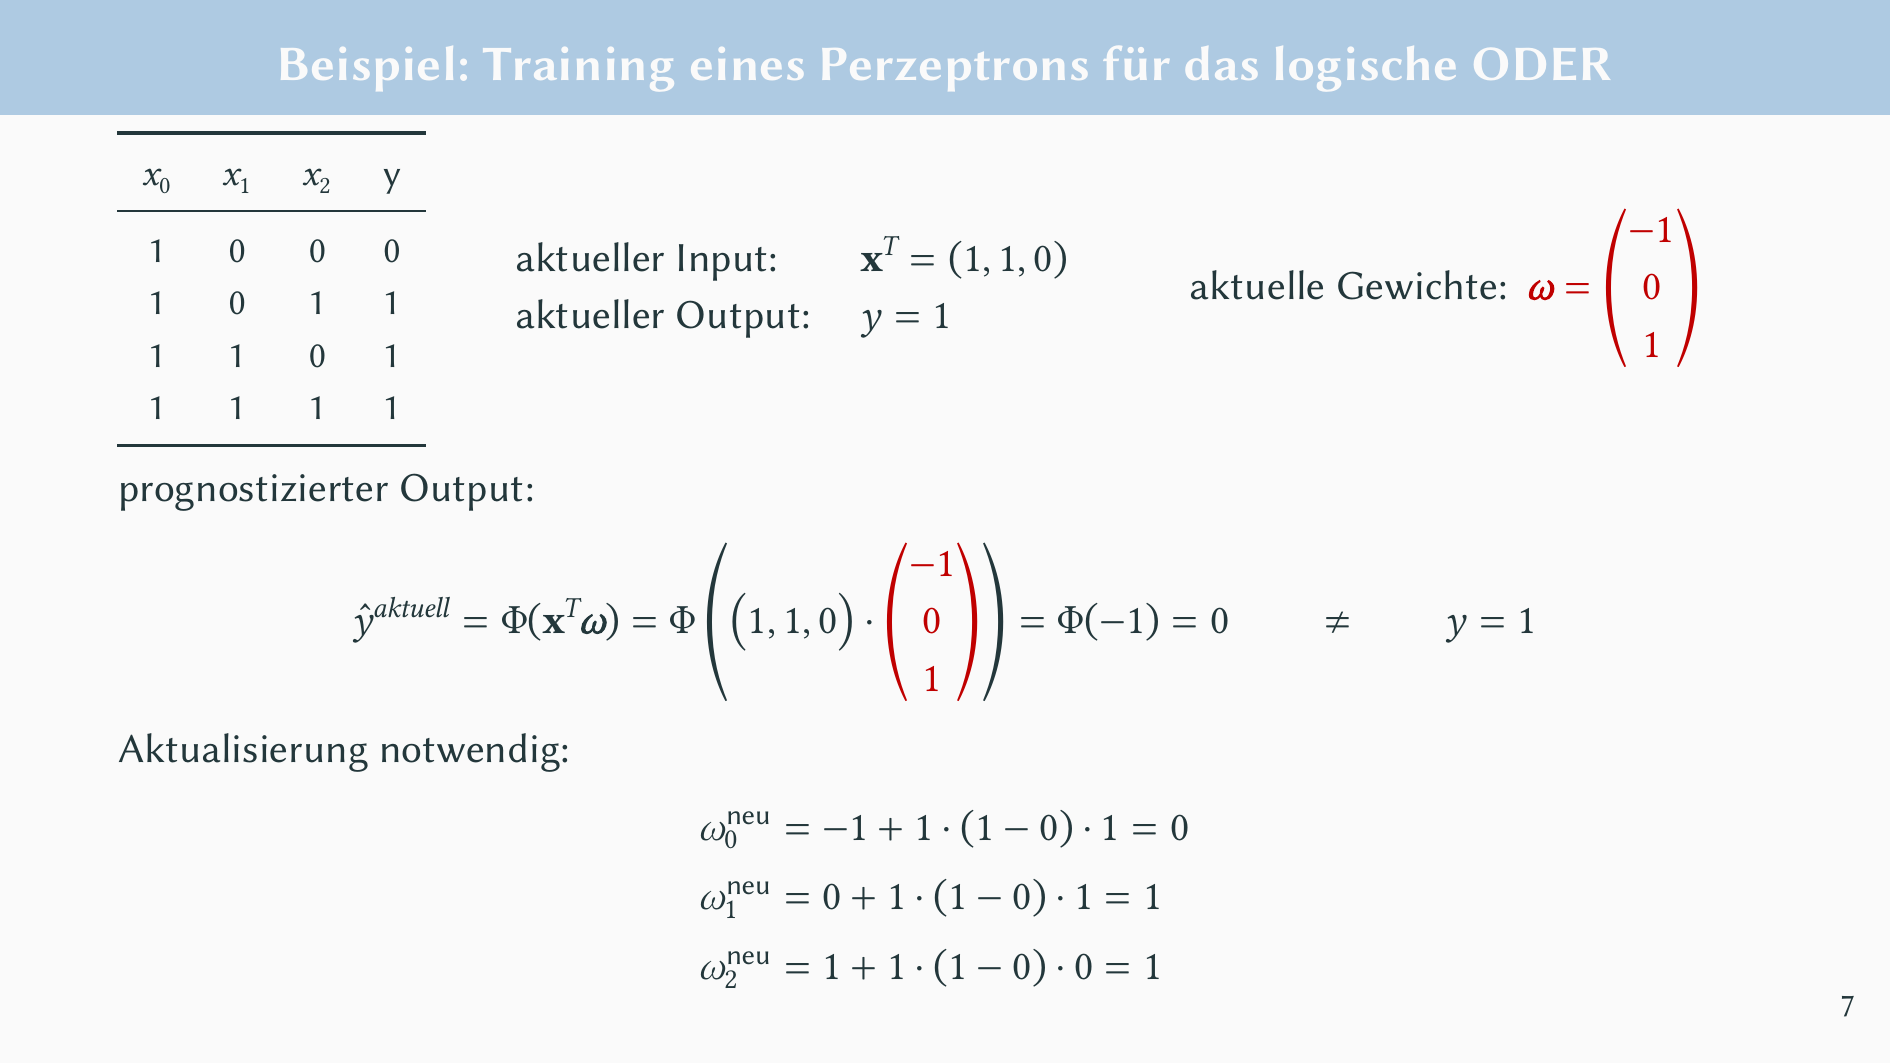
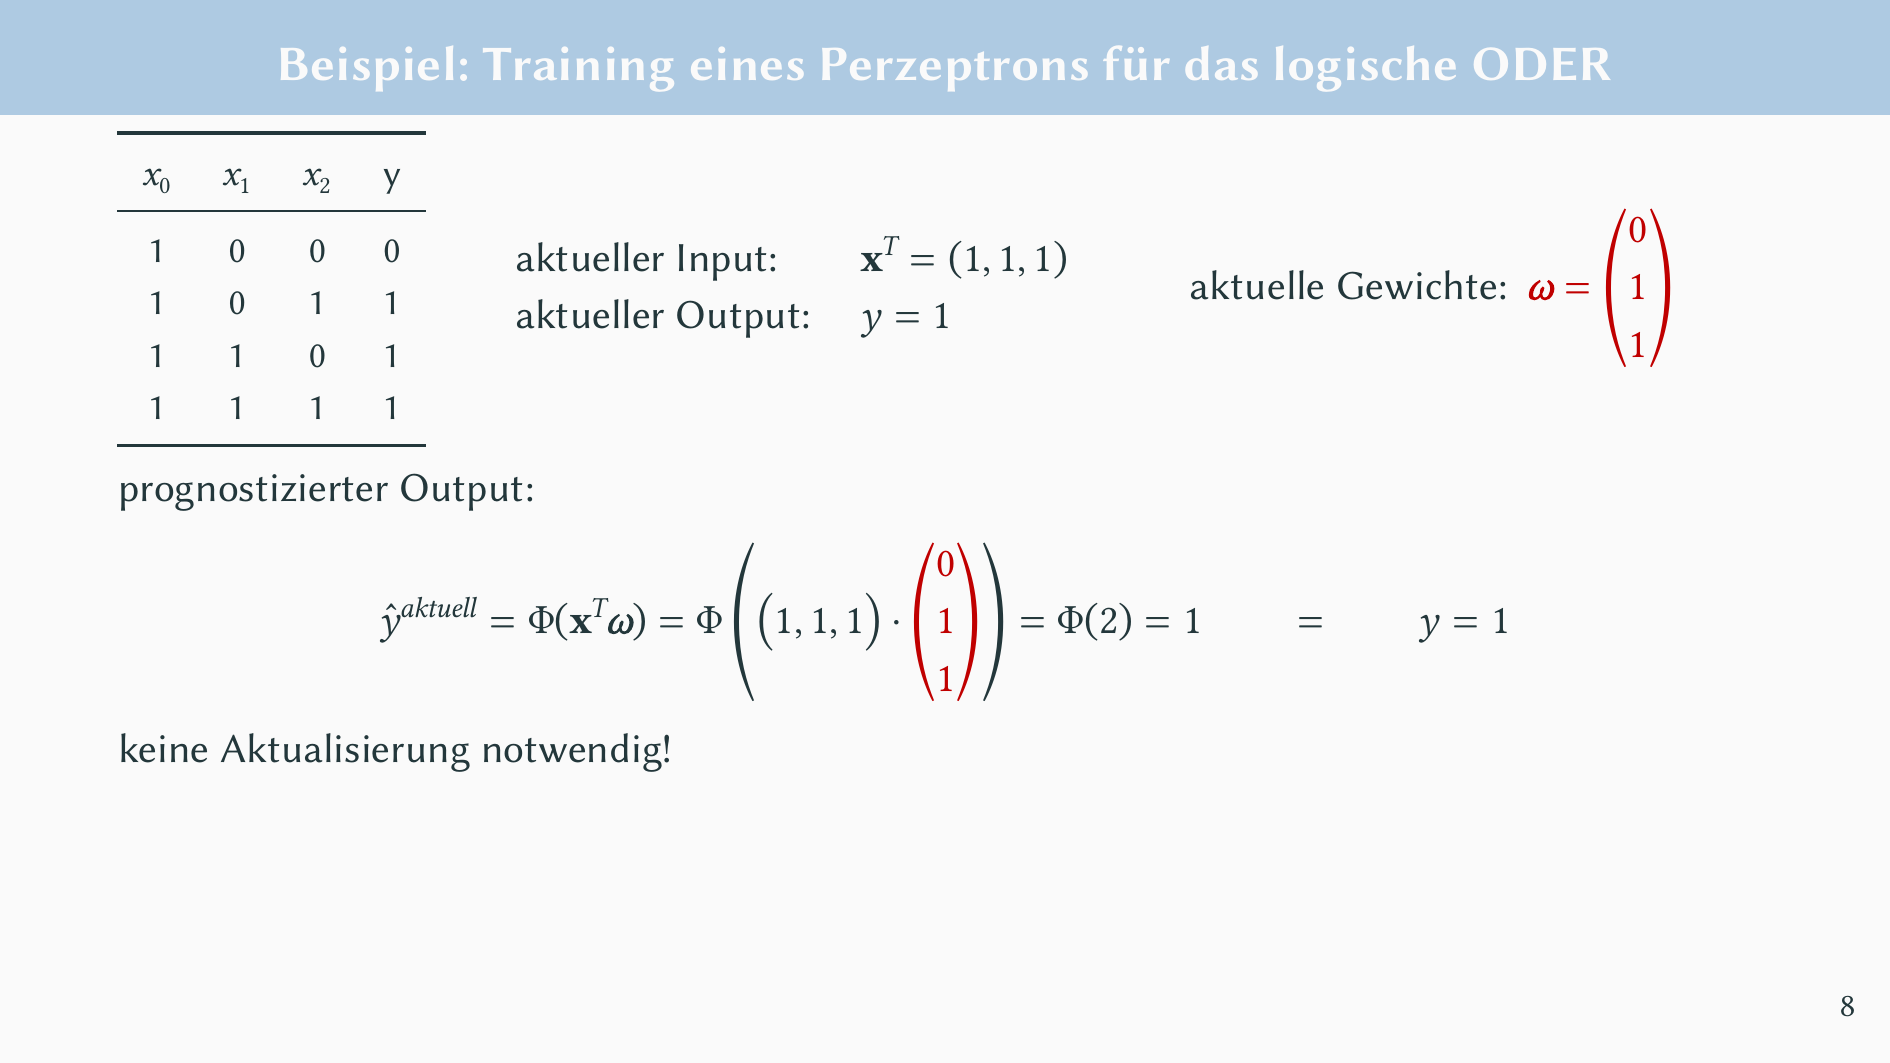
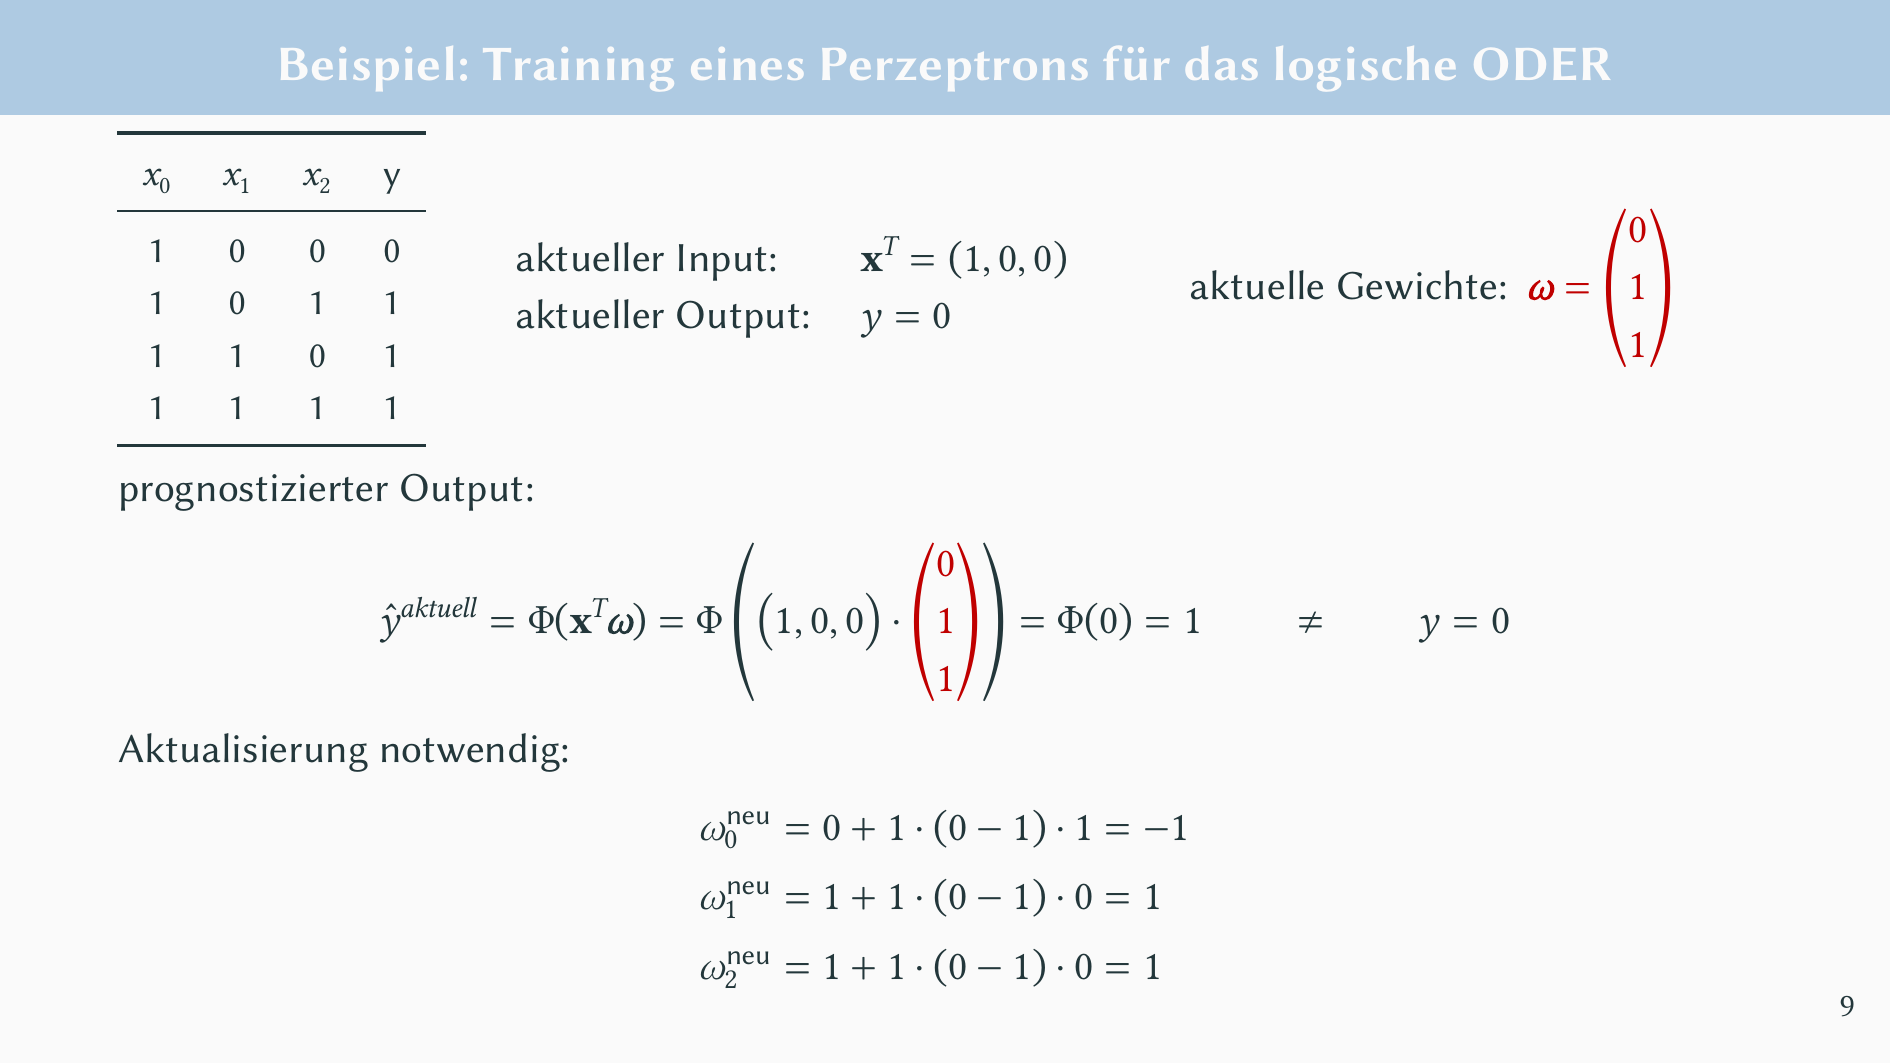
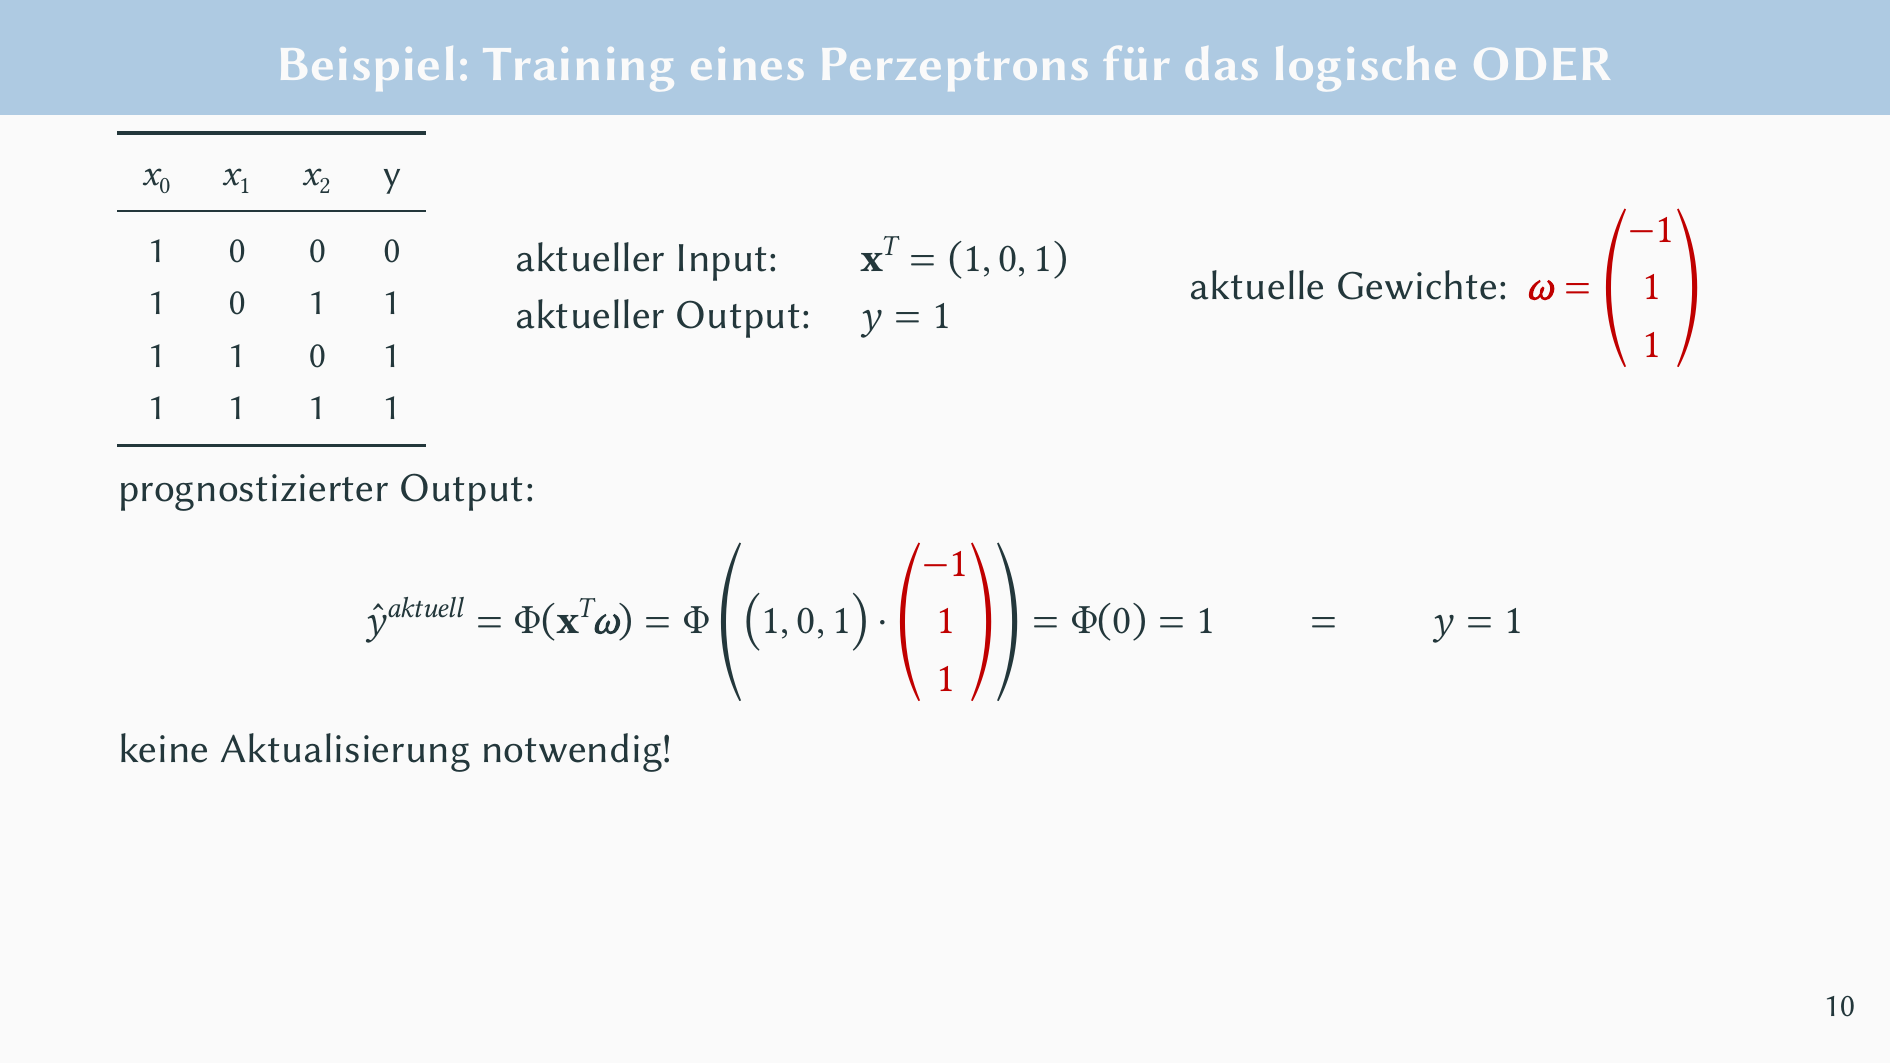
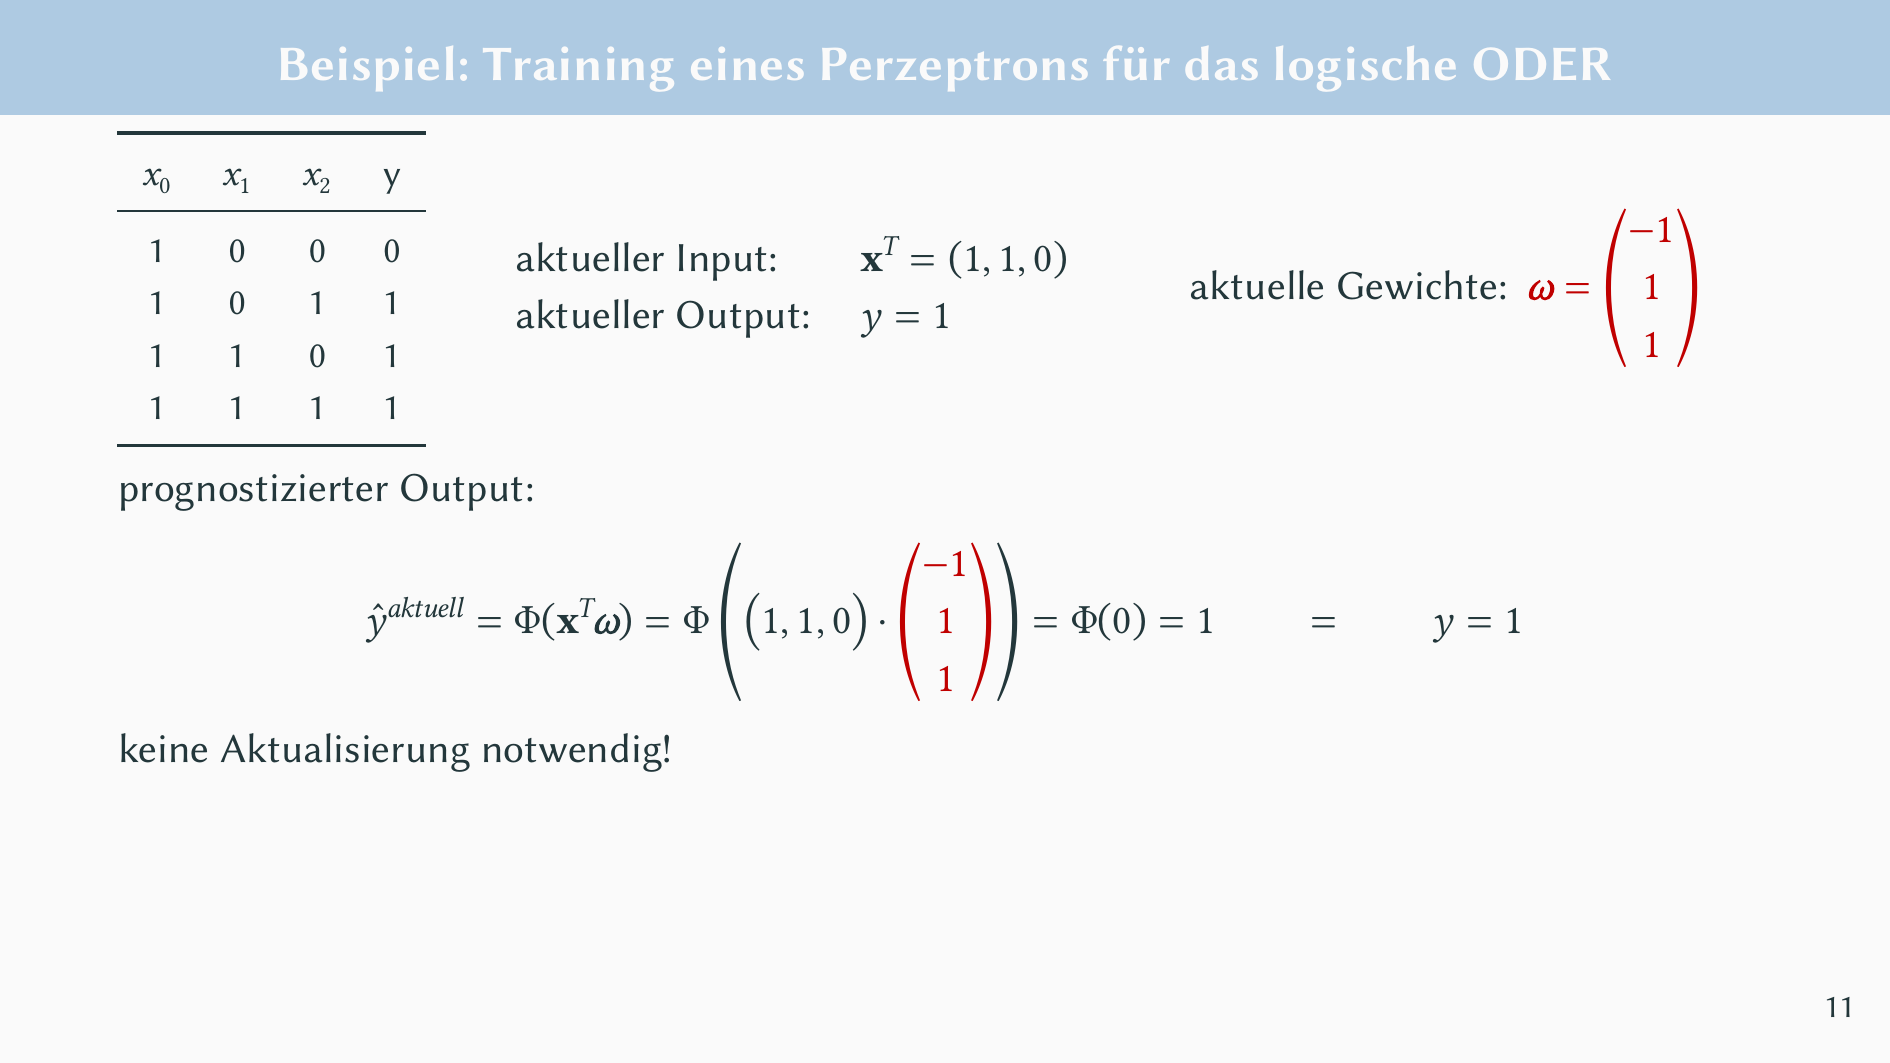
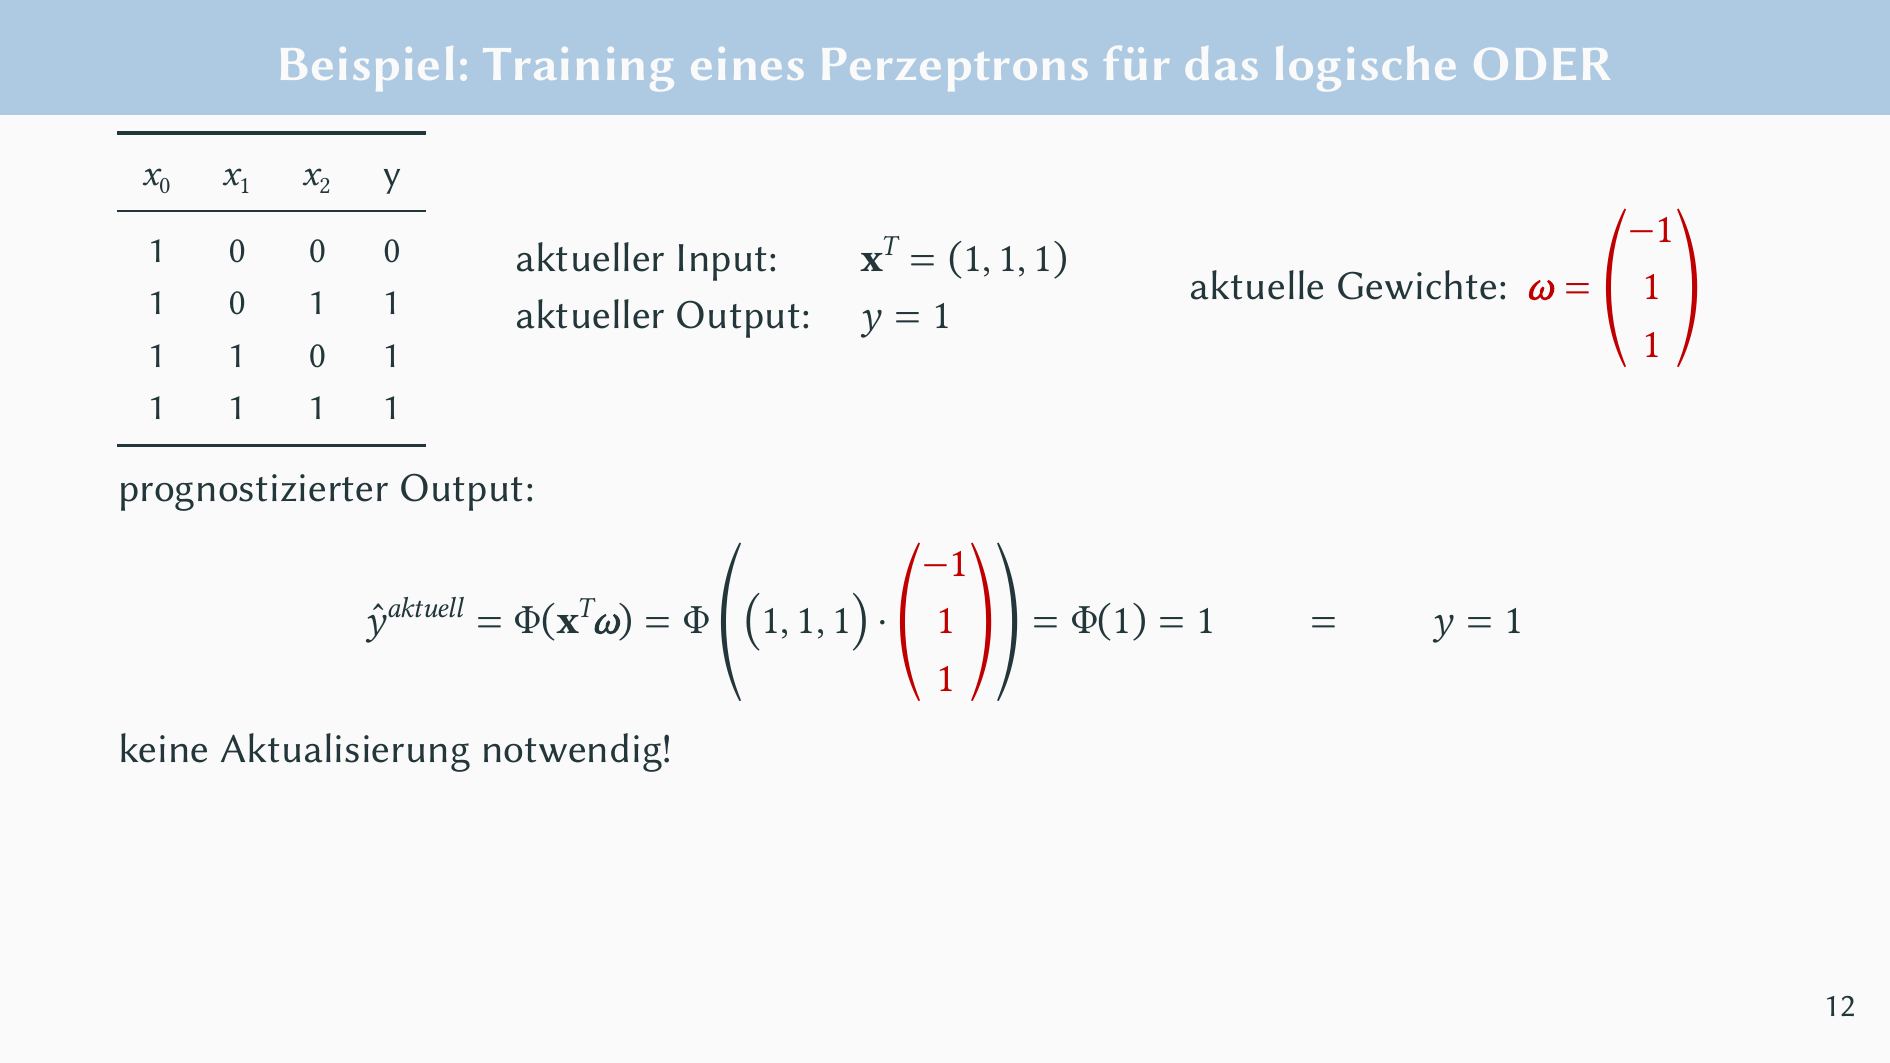
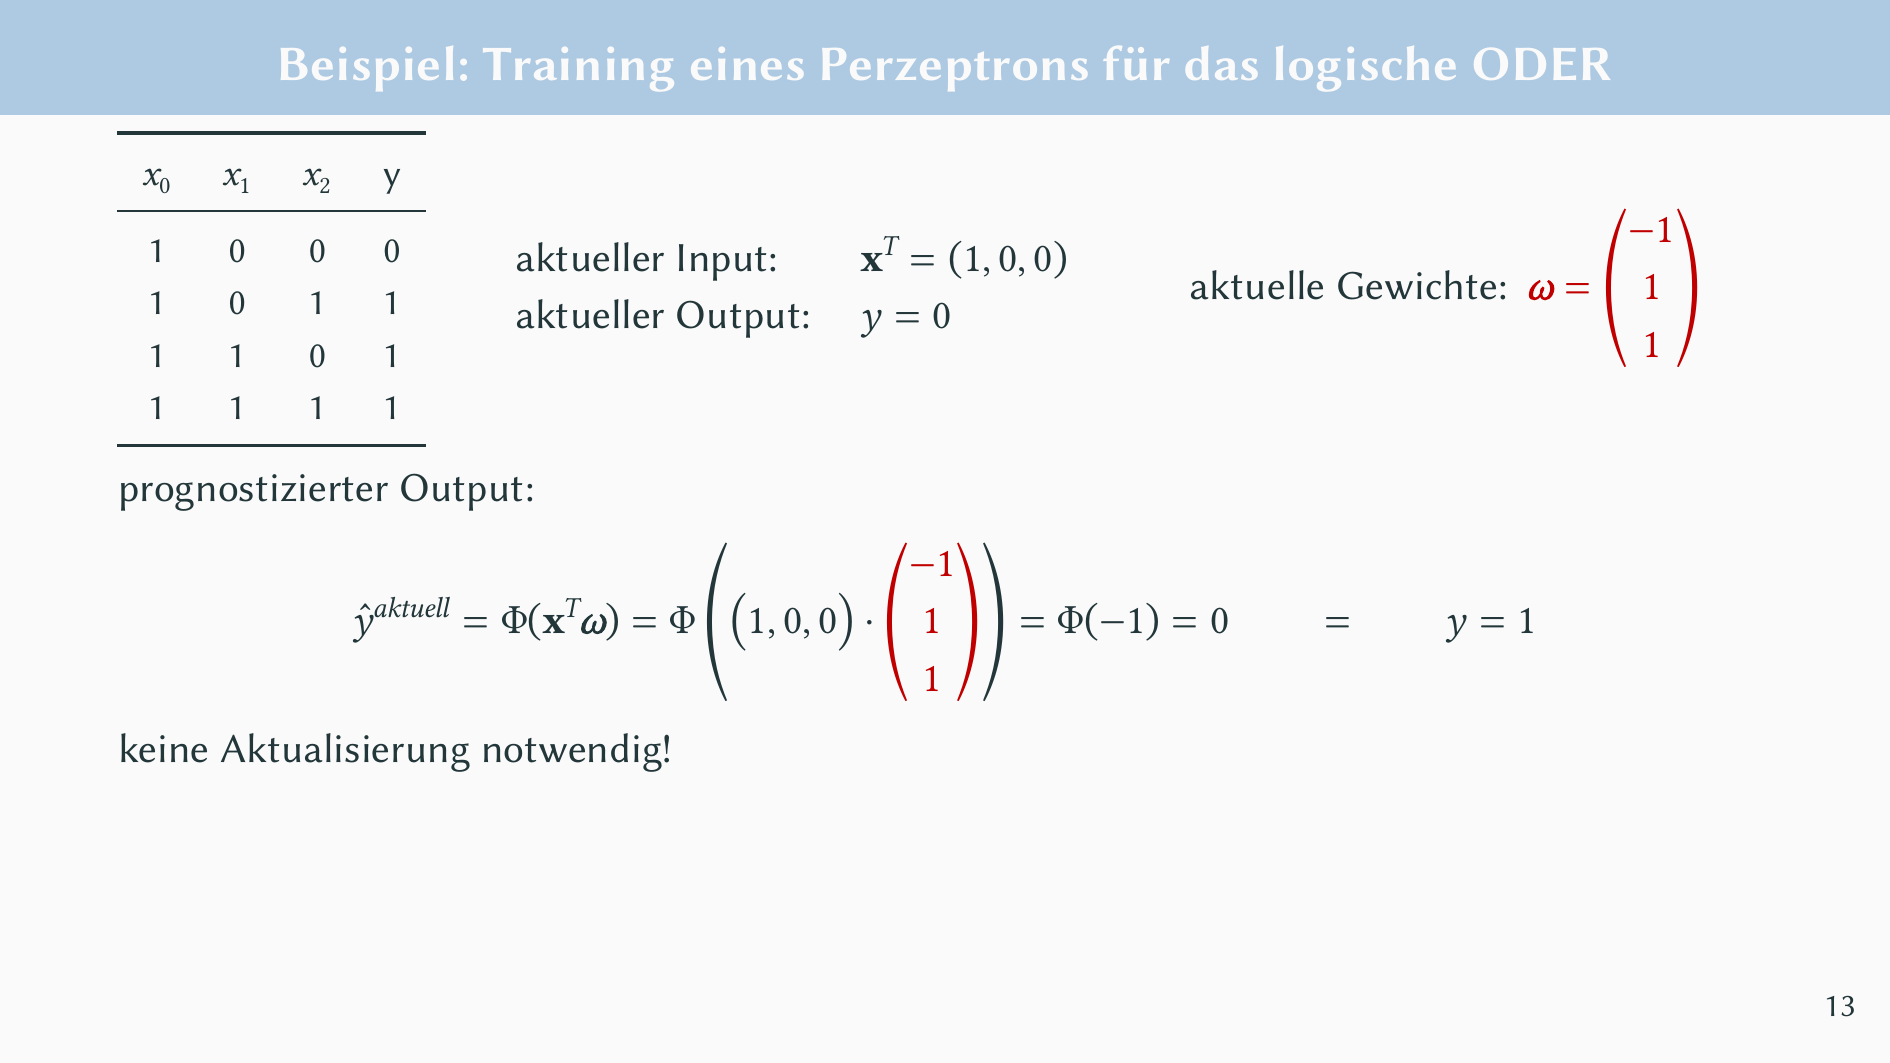

In [1]:
from IPython.display import HTML
HTML('../assets/chapter08/Perzeptron-Lernregel.html')

### Schritt 3: Terminierung

Die letzten vier Iterationen mit den Gewichten $(-1,1,1)$ prognostizierten
jeweils das richtige Ergebnis. Daher können wir nun mit den Iterationen stoppen.

Insgesamt brauchten wir 13 Iterationen, bis wir die Gewichte für unser Perzeptron gefunden haben. Die finalen Gewichte haben wir bereits nach neun Iterationen gefunden. Weitere vier Iterationen brauchten wir, um zu überprüfen, ob das Perzeptron die vier Datensätze korrekt prognostiziert. Oder anders ausgedrückt, mussten alle vier Datensätze noch einmal durchlaufen werden. Das Durchlaufen aller Datensätze kommt beim mschinellen Lernen häufig vor, so dass es dafür einen eigenen Fachbegriff gibt, nämlich die Epoche.

```{admonition} Was ist ... eine Epoche?
Das komplette Durchlaufen aller Trainingsdaten wird eine Epoche genannt.
```

## Zusammenfassung und Ausblick

In diesem Abschnitt haben wir uns mit dem händischen Training eines Perzeptrons beschäftigt. Als nächstes werden wir dazu eine Bibliothek kennenlernen, die diese Arbeit für uns übernimmt.